In [ ]:
# Link to dataset https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324

# The dataset is a CSV file that stores stats for all players in the European top 5 leagues (England, Spain, France, Germany, and Italy) for the 2023-2024 season.
# It includes detailed player information such as name, team, nationality, position, and age, along with key performance metrics.
# These metrics cover a range of categories, including appearances, minutes played, goals, assists, passes, shots, tackles, and other advanced stats like xG (expected goals) and xA (expected assists).

# The problem I aim to solve is to be able to classify a player as either a Goalkeeper, Defender, Midfielder, or Attacker based solely on their stats/metrics.
# The code achieves this by loading a CSV dataset containing football player statistics, cleaning the data, and filtering players who have played less than 270 minutes.
# It defines a Player class and its position subclasses (Goalkeeper, Defender, Midfielder, and Attacker) to represent players and their relevant attributes.
# After feature selection, it trains a Random Forest Classifier on player statistics, such as age, minutes played, and advanced metrics like expected goals (xG) and assists (xA), to predict a player's position (GK, DF, MF, FW).
# The target labels are encoded numerically, and the data is split into training and testing sets.
# The model's performance is evaluated through accuracy and a classification report, while feature importance is plotted to show the most relevant features in making the predictions.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# If you are NOT using google colab, you need to take this part out starting from here
from google.colab import files

uploaded = files.upload()
# till here

# Load the CSV data
df = pd.read_csv('top5-players.csv', header=0)
df_og = df
df = df.dropna()



Saving top5-players.csv to top5-players.csv


RandomForestClassifier
Accuracy: 60.00%
Classification Report:
              precision    recall  f1-score   support

          DF       0.67      0.89      0.76       235
       DF,FW       0.00      0.00      0.00        10
       DF,MF       0.00      0.00      0.00        25
          FW       0.54      0.68      0.60       105
       FW,DF       1.00      0.00      0.00         3
       FW,MF       0.33      0.33      0.33        92
          GK       1.00      1.00      1.00        51
          MF       0.62      0.52      0.56       151
       MF,DF       1.00      0.00      0.00        28
       MF,FW       0.39      0.28      0.33        60

    accuracy                           0.60       760
   macro avg       0.55      0.37      0.36       760
weighted avg       0.58      0.60      0.56       760


Feature Importance:
    Feature  Importance
       PrgR    0.109901
       PrgP    0.098301
      xG_90    0.095073
  xG+xAG_90    0.094972
    npxG_90    0.084359
npxG+xAG_90  

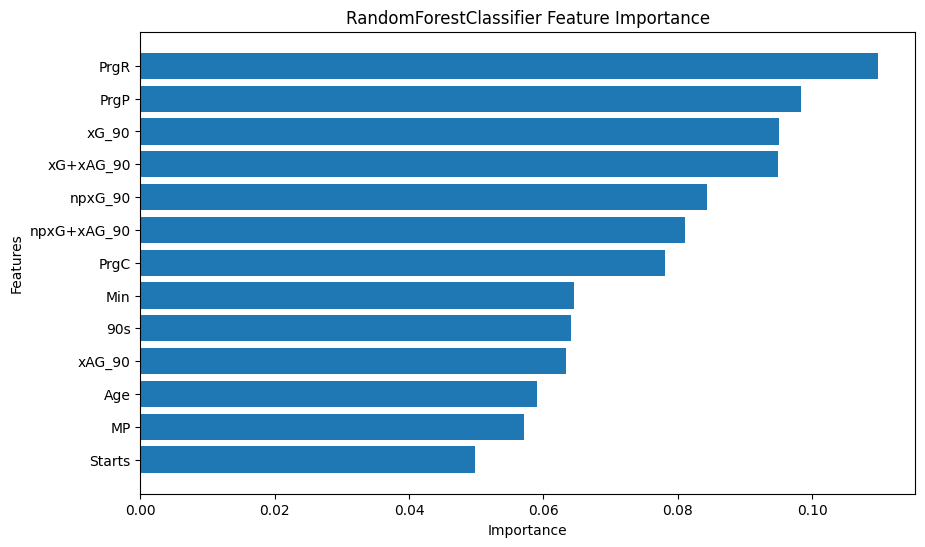

SVM Classifier
Accuracy: 42.89%
Classification Report:
              precision    recall  f1-score   support

          DF       0.79      0.43      0.56       235
       DF,FW       0.08      0.50      0.14        10
       DF,MF       0.06      0.20      0.09        25
          FW       0.64      0.57      0.60       105
       FW,DF       0.02      0.33      0.03         3
       FW,MF       0.46      0.29      0.36        92
          GK       1.00      1.00      1.00        51
          MF       0.60      0.32      0.42       151
       MF,DF       0.04      0.11      0.06        28
       MF,FW       0.34      0.40      0.37        60

    accuracy                           0.43       760
   macro avg       0.40      0.42      0.36       760
weighted avg       0.61      0.43      0.49       760


Feature Importance:
    Feature  Importance
npxG+xAG_90    0.861896
  xG+xAG_90    0.821746
     xAG_90    0.599900
         MP    0.331340
        90s    0.185957
    npxG_90    0.1550

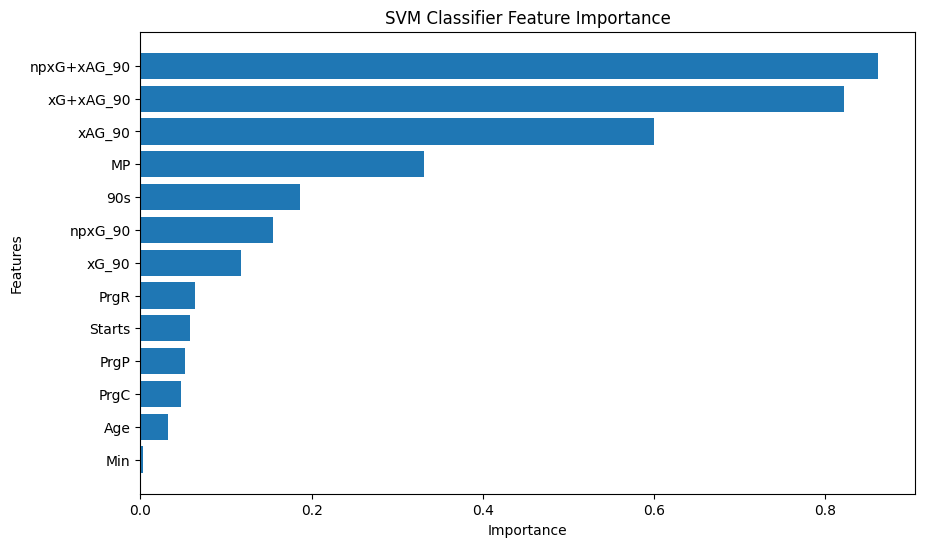

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier
Accuracy: 41.97%
Classification Report:
              precision    recall  f1-score   support

          DF       0.69      0.40      0.51       235
       DF,FW       0.04      0.30      0.07        10
       DF,MF       0.03      0.08      0.04        25
          FW       0.60      0.65      0.62       105
       FW,DF       0.00      0.00      0.00         3
       FW,MF       0.34      0.33      0.33        92
          GK       0.76      1.00      0.86        51
          MF       0.57      0.37      0.45       151
       MF,DF       0.04      0.07      0.05        28
       MF,FW       0.26      0.22      0.24        60

    accuracy                           0.42       760
   macro avg       0.33      0.34      0.32       760
weighted avg       0.52      0.42      0.45       760


Feature Importance:
    Feature  Importance
         MP    0.042770
       PrgP    0.034699
       PrgR    0.028001
       PrgC    0.011864
        Age    0.010858
     

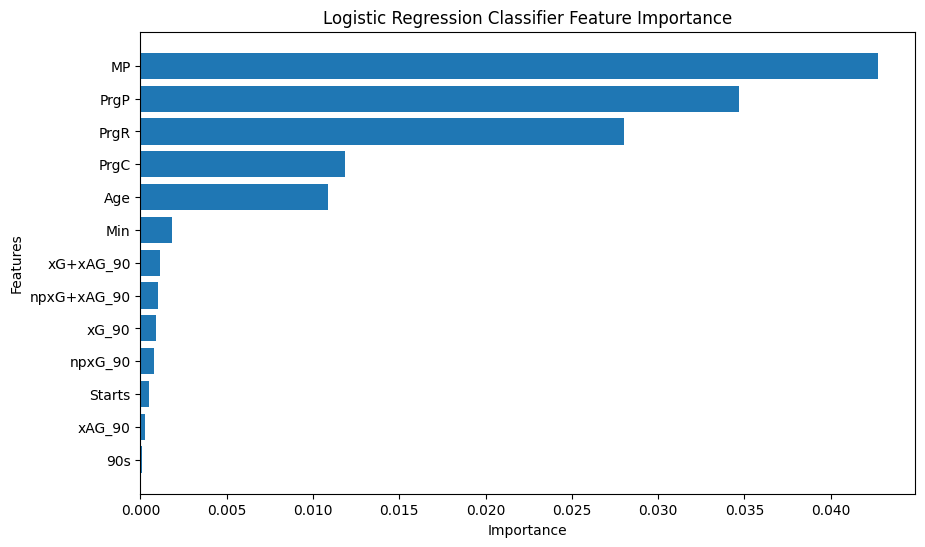

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:44:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 61.18%
Classification Report:
              precision    recall  f1-score   support

          DF       0.70      0.84      0.77       235
       DF,FW       0.00      0.00      0.00        10
       DF,MF       0.18      0.08      0.11        25
          FW       0.65      0.71      0.68       105
       FW,DF       1.00      0.00      0.00         3
       FW,MF       0.37      0.38      0.38        92
          GK       0.98      1.00      0.99        51
          MF       0.63      0.55      0.59       151
       MF,DF       0.00      0.00      0.00        28
       MF,FW       0.31      0.35      0.33        60

    accuracy                           0.61       760
   macro avg       0.48      0.39      0.38       760
weighted avg       0.58      0.61      0.59       760


Feature Importance:
    Feature  Importance
      xG_90    0.166969
npxG+xAG_90    0.130316
  xG+xAG_90    0.113921
       PrgC    0.097688
       PrgR    0.087038
       PrgP    0.

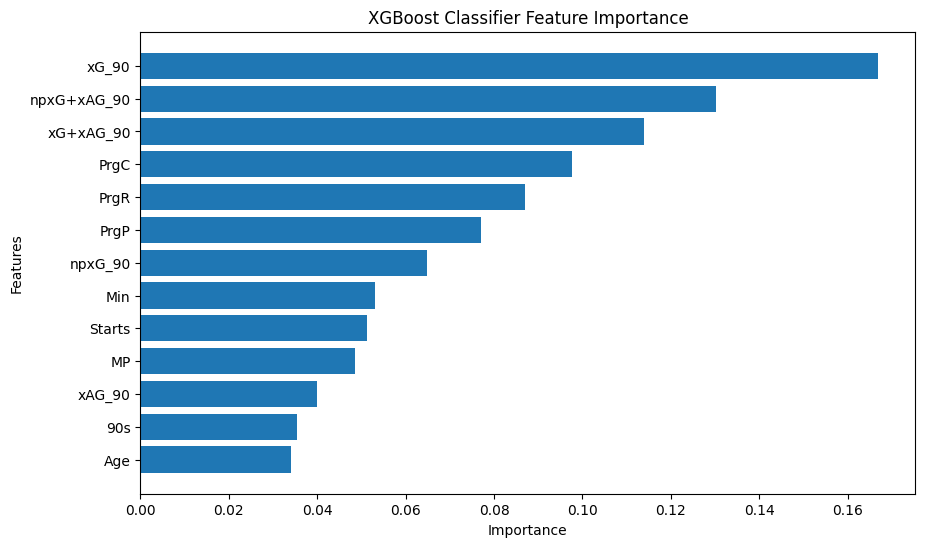

In [ ]:
# Print the first few rows of the dataframe to ensure it's loaded correctly
#print(df.head())

# Filter out players with less than 270 minutes
df_filtered = df[df['Min'] >= 270]
df = df_filtered

# Define the Player class
class Player:
    def __init__(self, rk, name, nation, pos, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
        self.rk = rk  # Ranking
        self.name = name  # Player's name
        self.nation = nation  # Player's nationality
        self.pos = pos  # Position on the field
        self.squad = squad  # The team or squad the player belongs to
        self.comp = comp  # The competition they are playing in
        self.age = age  # Current age
        self.born = born  # Year of birth
        self.mp = mp  # Minutes played
        self.starts = starts  # Matches started
        self.gls_90 = gls_90  # Goals per 90 minutes
        self.ast_90 = ast_90  # Assists per 90 minutes
        self.g_a_90 = g_a_90  # Goals + Assists per 90 minutes
        self.g_pk_90 = g_pk_90  # Goals excluding penalties per 90 minutes
        self.g_a_pk_90 = g_a_pk_90  # Goals + Assists excluding penalties per 90 minutes
        self.xg_90 = xg_90  # Expected goals per 90 minutes
        self.xag_90 = xag_90  # Expected assists per 90 minutes
        self.xg_xag_90 = xg_xag_90  # Expected goals + expected assists per 90 minutes
        self.npxg_90 = npxg_90  # Non-penalty expected goals per 90 minutes
        self.npxg_xag_90 = npxg_xag_90  # Non-penalty expected goals + expected assists per 90 minutes

    def __str__(self):
        return f"{self.name}({self.age}), {self.pos}"

# Define the specialized classes for each position
class GoalKeeper(Player):
    def __init__(self, rk, name, nation, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
        super().__init__(rk, name, nation, 'GK', squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90)

class Defender(Player):
    def __init__(self, rk, name, nation, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
        super().__init__(rk, name, nation, 'DF', squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90)

class Midfielder(Player):
    def __init__(self, rk, name, nation, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
        super().__init__(rk, name, nation, 'MF', squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90)

class Attacker(Player):
    def __init__(self, rk, name, nation, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
        super().__init__(rk, name, nation, 'FW', squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90)

# Feature Selection for Classification
# Assuming the dataframe has columns for these features
#(self, rk, name, nation, pos, squad, comp, age, born, mp, starts, gls_90, ast_90, g_a_90, g_pk_90, g_a_pk_90, xg_90, xag_90, xg_xag_90, npxg_90, npxg_xag_90):
features = ['Age', 'MP', 'Min', 'Starts', '90s', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90', 'PrgC', 'PrgP', 'PrgR', 'npxG+xAG_90']
X = df[features]  # Feature matrix
y = df['Pos']  # Target column (Position)

# Encode the target labels (GK, DF, MF, FW) into numeric values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, random_state=42)



def print_model_results(model_name, accuracy, class_report, feature_importance_df):
    # Print model name
    print(f"{model_name}")

    # Print accuracy
    print(f"Accuracy: {accuracy:.2f}%")

    # Print classification report
    print("Classification Report:")
    print(class_report)

    # Print feature importance
    print("\nFeature Importance:")
    print(feature_importance_df.to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'{model_name} Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
# ---------------- RandomForestClassifier Model ---------------- #
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# RandomForestClassifier evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
class_report_rf = classification_report(y_test, y_pred_rf, target_names=encoder.classes_, zero_division=1)

# RandomForestClassifier feature importance
rf_importances = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print RandomForest results
print_model_results("RandomForestClassifier", accuracy_rf, class_report_rf, rf_feature_importance_df)

# ---------------- SVM Model ---------------- #
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
class_report_svm = classification_report(y_test, y_pred_svm, target_names=encoder.classes_, zero_division=1)

# SVM feature importance (using coefficients)
svm_importances = np.abs(svm_model.coef_[0])
svm_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': svm_importances})
svm_feature_importance_df = svm_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print SVM results
print_model_results("SVM Classifier", accuracy_svm, class_report_svm, svm_feature_importance_df)


# ---------------- Logistic Regression Model ---------------- #
log_model = LogisticRegression(max_iter=200, random_state=42, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Logistic Regression evaluation
accuracy_log = accuracy_score(y_test, y_pred_log) * 100
class_report_log = classification_report(y_test, y_pred_log, target_names=encoder.classes_, zero_division=1)

# Logistic Regression feature importance (using coefficients)
log_importances = np.abs(log_model.coef_[0])
log_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': log_importances})
log_feature_importance_df = log_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print Logistic Regression results
print_model_results("Logistic Regression Classifier", accuracy_log, class_report_log, log_feature_importance_df)


# ---------------- XGBoost Model ---------------- #
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=encoder.classes_, zero_division=1)

# XGBoost feature importance
xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print XGBoost results
print_model_results("XGBoost Classifier", accuracy_xgb, class_report_xgb, xgb_feature_importance_df)